<a href="https://colab.research.google.com/github/natalyortizbotero/streamlit-example/blob/master/Energy_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import of data and libraries

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set display options for Pandas
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Set Seaborn default style
sns.set()

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load Data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Energy/eco2mix-regional-cons-def.csv', sep=";")

Renaming columns (translating from French)

In [ ]:
df.columns = ["INSEE_Region_code",	"Region",	"Nature",	"Date",	"Hour",	"Date_hour",	"Consumption_MW",	"Thermal_MW",	"Nuclear_MW",	"Wind_MW", 
                        "Solar_MW",	"Hydraulic_MW",	"Pumping_MW",	"Bioenergies_MW",	"Physical_Exchange_MW",	"Battery_storage",	"Battery_destocking", 
                        "Onshore_wind",	"Offshore_wind",	"Thermal_TCO%",	"Thermal_TCH%",	"Nuclear_TCO%",	"Nuclear_TCH%",	"Wind_TCO%", 
                        "Wind_TCH%",	"Solar_TCO%",	"Solar_TCH%",	"Hydraulic_TCO%",	"Hydraulic_TCH%",	"Bioenergy_TCO%", 
                        "Bioenergy_TCH%", "Column30"]

# Data exploration

In [ ]:
# Shape and preview
print('Set shape:', df.shape)
df.head(20)

Set shape: (1980288, 32)


,INSEE_Region_code,Region,Nature,Date,Hour,Date_hour,Consumption_MW,Thermal_MW,Nuclear_MW,Wind_MW,Solar_MW,Hydraulic_MW,Pumping_MW,Bioenergies_MW,Physical_Exchange_MW,Battery_storage,Battery_destocking,Onshore_wind,Offshore_wind,Thermal_TCO%,Thermal_TCH%,Nuclear_TCO%,Nuclear_TCH%,Wind_TCO%,Wind_TCH%,Solar_TCO%,Solar_TCH%,Hydraulic_TCO%,Hydraulic_TCH%,Bioenergy_TCO%,Bioenergy_TCH%,Column30
0,28,Normandie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,Bretagne,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Île-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Hauts-de-France,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,75,Nouvelle-Aquitaine,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,84,Auvergne-Rhône-Alpes,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,93,Provence-Alpes-Côte d'Azur,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,76,Occitanie,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,44,Grand Est,Données définitives,2013-01-01,00:00,2013-01-01T00:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# First observations for every region has no information about production/consumption of energy.
# Fill first time period with next time period's values (for all regions)
numcols = ['Consumption_MW',
       'Thermal_MW', 'Nuclear_MW', 'Wind_MW', 'Solar_MW', 'Hydraulic_MW', 'Pumping_MW',
       'Bioenergies_MW', 'Physical_Exchange_MW', 'Battery_storage', 'Battery_destocking',
       'Onshore_wind', 'Offshore_wind', 'Thermal_TCO%', 'Thermal_TCH%', 'Nuclear_TCO%',
       'Nuclear_TCH%', 'Wind_TCO%', 'Wind_TCH%', 'Solar_TCO%', 'Solar_TCH%', 'Hydraulic_TCO%',
       'Hydraulic_TCH%', 'Bioenergy_TCO%', 'Bioenergy_TCH%']
for region in df['Region'].unique():
  df.loc[(df["Date"] == "2013-01-01") & (df["Hour"] == "00:00") & (df["Region"] == region), numcols] = df.loc[(df["Date"] == "2013-01-01") & (df["Hour"] == "00:30") & (df["Region"] == region), numcols].values


### Visual presentation of administrative regions in France

![image](https://i.imgur.com/C0QFfbW.png)

In [ ]:
# Info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 32 columns):
 #   Column                Dtype  
---  ------                -----  
 0   INSEE_Region_code     int64  
 1   Region                object 
 2   Nature                object 
 3   Date                  object 
 4   Hour                  object 
 5   Date_hour             object 
 6   Consumption_MW        float64
 7   Thermal_MW            float64
 8   Nuclear_MW            float64
 9   Wind_MW               float64
 10  Solar_MW              float64
 11  Hydraulic_MW          float64
 12  Pumping_MW            float64
 13  Bioenergies_MW        float64
 14  Physical_Exchange_MW  float64
 15  Battery_storage       float64
 16  Battery_destocking    float64
 17  Onshore_wind          float64
 18  Offshore_wind         float64
 19  Thermal_TCO%          float64
 20  Thermal_TCH%          float64
 21  Nuclear_TCO%          float64
 22  Nuclear_TCH%          float64
 23  Wind_TC

In [ ]:
# Set float format to only 1 decimal
pd.set_option('float_format', '{:.1f}'.format)
# Describe the dataset
df.describe()

,INSEE_Region_code,Consumption_MW,Thermal_MW,Nuclear_MW,Wind_MW,Solar_MW,Hydraulic_MW,Pumping_MW,Bioenergies_MW,Physical_Exchange_MW,Battery_storage,Battery_destocking,Onshore_wind,Offshore_wind,Thermal_TCO%,Thermal_TCH%,Nuclear_TCO%,Nuclear_TCH%,Wind_TCO%,Wind_TCH%,Solar_TCO%,Solar_TCH%,Hydraulic_TCO%,Hydraulic_TCH%,Bioenergy_TCO%,Bioenergy_TCH%,Column30
count,1980288.0,1980288.0,1980288.0,1155168.0,1980192.0,1980288.0,1980288.0,1120127.0,1980288.0,1843392.0,279360.0,244224.0,244224.0,142464.0,508032.0,508032.0,398112.0,398112.0,508032.0,508032.0,508032.0,508032.0,263808.0,263808.0,263808.0,263808.0,0.0
mean,49.9,4497.7,378.3,6232.6,256.5,92.0,600.2,-116.2,83.3,-463.4,-330.9,8.0,23.9,153.3,8.4,22.8,55.8,31.1,9.9,27.1,2.8,33.7,11.7,28.0,2.3,53.9,NaN
std,25.6,2170.4,540.8,3043.2,433.4,224.8,1028.9,313.5,44.6,4209.7,4128.6,9.9,21.4,118.7,10.7,20.8,93.5,30.6,13.7,20.9,5.3,26.5,17.1,27.5,0.9,12.8,NaN
min,11.0,720.0,-83.0,-144.0,-6.0,-23.0,-6.0,-2581.0,4.0,-12219.0,-10152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,14.0,NaN
25%,27.8,2789.0,24.0,3598.0,27.0,0.0,5.0,-16.0,48.0,-3802.0,-4054.0,0.8,4.4,61.6,1.0,5.6,0.0,0.0,0.4,9.1,0.0,0.2,0.1,12.2,1.7,45.5,NaN
50%,48.0,4111.0,156.0,6214.0,105.0,1.0,57.0,0.0,74.0,88.0,673.0,4.3,20.9,116.3,4.2,17.3,4.5,27.0,4.0,23.3,1.7,39.9,2.0,25.1,2.1,53.7,NaN
75%,75.2,5741.0,491.0,8722.0,299.0,67.0,879.0,0.0,116.0,2141.0,2218.0,10.1,37.9,197.2,11.4,35.0,87.5,54.9,14.5,41.9,2.6,57.5,18.4,42.1,2.7,64.0,NaN
max,93.0,15338.0,4293.0,13632.0,4900.0,2894.0,8742.0,0.0,548.0,13959.0,13553.0,68.1,93.9,767.8,93.8,99.2,784.2,102.0,103.6,118.0,80.2,112.4,116.0,2550.0,9.7,243.6,NaN


In [ ]:
# Modality of columns:
df.nunique()

INSEE_Region_code           12
Region                      12
Nature                       2
Date                      3438
Hour                        48
Date_hour               165004
Consumption_MW           13284
Thermal_MW                4022
Nuclear_MW               13376
Wind_MW                   4638
Solar_MW                  2478
Hydraulic_MW              7397
Pumping_MW                2374
Bioenergies_MW             312
Physical_Exchange_MW     24078
Battery_storage          20571
Battery_destocking        5108
Onshore_wind              8406
Offshore_wind            38005
Thermal_TCO%              7078
Thermal_TCH%              9208
Nuclear_TCO%             36959
Nuclear_TCH%             10091
Wind_TCO%                 8167
Wind_TCH%                 9157
Solar_TCO%                5081
Solar_TCH%                8274
Hydraulic_TCO%            8370
Hydraulic_TCH%            6661
Bioenergy_TCO%             661
Bioenergy_TCH%            2440
Column30                     0
dtype: i

In [ ]:
# Missing values:
mv=pd.DataFrame(df.isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

,Number_missing,Percentage_missing
INSEE_Region_code,0,0.0
Region,0,0.0
Nature,0,0.0
Date,0,0.0
Hour,0,0.0
Date_hour,0,0.0
Consumption_MW,0,0.0
Thermal_MW,0,0.0
Nuclear_MW,825120,41.7
Wind_MW,96,0.0


In [ ]:
# Droping "Column30" as is empty, TCH and TCO as they are calculated from other columns and may distort the prediction results. We also drop columns of storage, destorage and physical exchange of energy, as it's not in the scope of our project.
to_drop = ["Battery_storage", "Battery_destocking", "Thermal_TCO%", "Nuclear_TCO%", "Wind_TCO%", "Solar_TCO%", "Hydraulic_TCO%", "Bioenergy_TCO%", "Thermal_TCH%", "Nuclear_TCH%", "Wind_TCH%", "Solar_TCH%", "Hydraulic_TCH%", "Bioenergy_TCH%", "Column30", "Physical_Exchange_MW", "Nature"]
df.drop(to_drop, axis=1, inplace= True)

Checking in which regions nuclear energy production equals zero

In [ ]:
mvn = df[df['Nuclear_MW'].isnull()].groupby(by=["Region"]).size()
mvn

Region
Bourgogne-Franche-Comté       165024
Bretagne                      165024
Pays de la Loire              165024
Provence-Alpes-Côte d'Azur    165024
Île-de-France                 165024
dtype: int64

In [ ]:
# There are no observations for 5 regions: Bourgogne-Franche-Comté, Bretagne, Pays de la Loire, Provence-Alpes-Côte d'Azur, Île-de-France.
# The reason is: no nuclear plants in these regions! Other regions have no missing values.
# Nan values can be replaced with zeros.
df['Nuclear_MW'] = df['Nuclear_MW'].fillna(0)

Checking in which regions pumping energy production equals zero

In [ ]:
mvp = df[df['Pumping_MW'].isnull()]
print(mvp.groupby(by=["Region"]).size())

Region
Centre-Val de Loire    165024
Hauts-de-France         35041
Normandie              165024
Nouvelle-Aquitaine     165024
Pays de la Loire       165024
Île-de-France          165024
dtype: int64


In [ ]:
# There are missing values of hydraulic pumps energy production&consumption for  regions.
# Moreover, for "Hauts-de-France" there are no values until begin of 2015.
# Nan values can be replaced with zeros.
df['Pumping_MW'] = df['Pumping_MW'].fillna(0)

Checking in which regions wind energy production equals zero

In [ ]:
mvp = df[df['Wind_MW'].isnull()]
mvpr = mvp.groupby(by=["Region"]).size()
mvpr[mvpr > 1]

Region
Centre-Val de Loire    48
Île-de-France          48
dtype: int64

As the wind data is collected for offshore and onshore only since the beginning of 2021, we will consider in our further analysis only the whole wind energy production. We concatenate columns Wind_MW, Offshore_wind and Onshore_wind

In [ ]:
#Replacing all Wind variables with mean
df['Wind_MW'] = df['Wind_MW'].fillna(df["Wind_MW"].mean())

In [ ]:
df['Offshore_wind'] = df['Offshore_wind'].fillna(0)
df['Onshore_wind'] = df['Onshore_wind'].fillna(0)

In [ ]:
df['Wind_MW'] = df['Wind_MW']+df["Onshore_wind"]+df["Offshore_wind"]

df.drop(["Onshore_wind", "Offshore_wind"], axis=1, inplace=True)

In [ ]:
# Missing values:
mv=pd.DataFrame(df.isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(df),2)
mv

,Number_missing,Percentage_missing
INSEE_Region_code,0,0.0
Region,0,0.0
Date,0,0.0
Hour,0,0.0
Date_hour,0,0.0
Consumption_MW,0,0.0
Thermal_MW,0,0.0
Nuclear_MW,0,0.0
Wind_MW,0,0.0
Solar_MW,0,0.0


Creating new columns for further analysis

In [ ]:
df["Production"]= df['Thermal_MW']+ df['Nuclear_MW']+ df['Wind_MW'] + df['Solar_MW'] + df['Hydraulic_MW']+ df['Pumping_MW'] + df['Bioenergies_MW']
renewables = ['Bioenergies_MW', 'Wind_MW', 'Solar_MW', 'Hydraulic_MW']
df["Renewable_MW"] = df['Bioenergies_MW']+ df['Wind_MW']+ df['Solar_MW'] + df['Hydraulic_MW']

# Seasonality of energy consumption analysis

In [ ]:
# Adding columns to time analyse
df["Date"] = pd.to_datetime(df.Date)
df["Year"] = pd.DatetimeIndex(df['Date']).year
df["Month"] = pd.DatetimeIndex(df['Date']).month
df["Quarter"] = pd.DatetimeIndex(df['Date']).quarter
df["DoW"] = pd.DatetimeIndex(df['Date']).dayofweek
df["Day"] = pd.DatetimeIndex(df['Date']).day
# production/consumption for the whole country 
dff = df.groupby(by=["Year", "Quarter", "Month", "Day", "Hour"]).sum().drop(["INSEE_Region_code", "DoW"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 20 columns):
 #   Column             Dtype         
---  ------             -----         
 0   INSEE_Region_code  int64         
 1   Region             object        
 2   Date               datetime64[ns]
 3   Hour               object        
 4   Date_hour          object        
 5   Consumption_MW     float64       
 6   Thermal_MW         float64       
 7   Nuclear_MW         float64       
 8   Wind_MW            float64       
 9   Solar_MW           float64       
 10  Hydraulic_MW       float64       
 11  Pumping_MW         float64       
 12  Bioenergies_MW     float64       
 13  Production         float64       
 14  Renewable_MW       float64       
 15  Year               int64         
 16  Month              int64         
 17  Quarter            int64         
 18  DoW                int64         
 19  Day                int64         
dtypes: datetime64[ns](1), fl

Seasonality of energy consumption

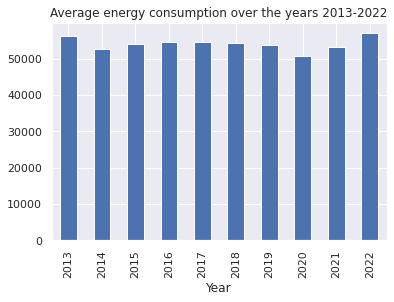

In [ ]:
dff.groupby(['Year'])['Consumption_MW'].mean().plot(kind='bar', title="Average energy consumption over the years 2013-2022");


We can see the energy consumption has a big decrease in 2020 most probably because of the covid lockdowns and companies being closed and it starts growing again for 2021 and 2022, having in consideration that for 2022 we only have data until 31st of May

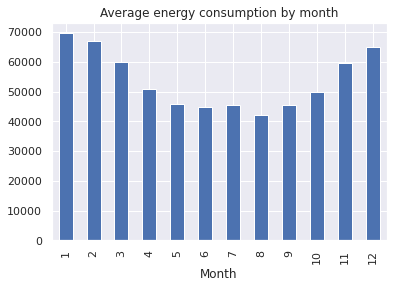

In [ ]:
dff.groupby(['Month'])['Consumption_MW'].mean().plot(kind='bar', title="Average energy consumption by month");

We can clearly see that the energy consumption is higher in colder months (Winter), and its highest beign Jan and Feb as they are usually the coldest months of the year

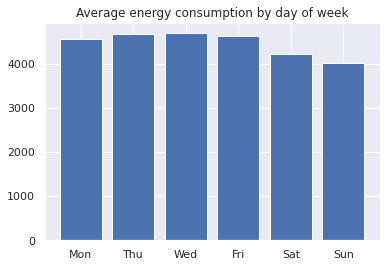

In [ ]:
daysofweek = ["Mon", "Thu", "Wed", "Thu", "Fri", "Sat", "Sun"]
y = df.groupby(['DoW'])['Consumption_MW'].mean()
x = daysofweek
plt.bar(x, y)
plt.title("Average energy consumption by day of week");

We can observe that the energy consumption decreases on the weekend.
We can potentially say that this trend is because offices, company warehouses, and such are closed.

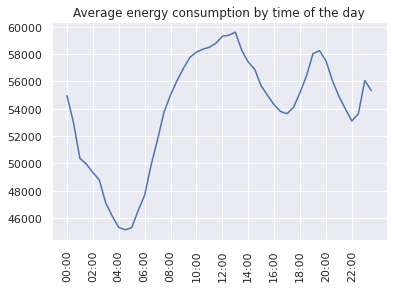

In [ ]:
daysofweek = ["Mon", "Thu", "Wed", "Thu", "Fri", "Sat", "Sun"]
y = dff.groupby(['Hour'])['Consumption_MW'].mean()
plt.plot(y)
plt.xticks(["00:00", "02:00", "04:00", "06:00", "08:00", "10:00", "12:00", "14:00", "16:00", "18:00", "20:00", "22:00"], rotation=90)
plt.title("Average energy consumption by time of the day");

Clearly energy consumption decreases during the night, regularly the time we are sleeping

# Energy Production vs. Consumption

In [ ]:
yearlycons = dff.groupby(['Year'])['Consumption_MW'].sum()
yearlyprod = dff.groupby(['Year'])['Production'].sum()

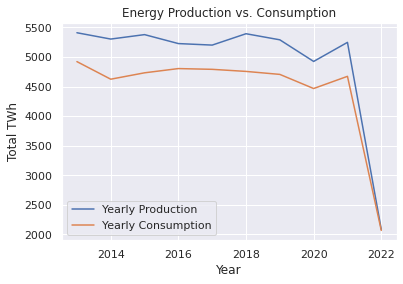

In [ ]:
from pandas import DataFrame
value1 = yearlyprod 
value2 = yearlycons 

yearlycp = DataFrame({'Yearly Production': value1/200000, 'Yearly Consumption': value2/200000})

yearlycp.plot()
plt.legend(loc='lower left')
plt.xlabel("Year")
plt.ylabel("Total TWh")
plt.title("Energy Production vs. Consumption")
plt.show();

France has a very good forecast on the energy field as its energy production is higher and is enough for its energy consumption
The decrease in 2022 as previosly mentioned is because of the missing data after May 31st.

# Regional Analyse

<ipython-input-29-46a066241929>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearregion = df.groupby(by=['Year', 'Region'])['Year', 'Region',"Consumption_MW", "Production"].mean()


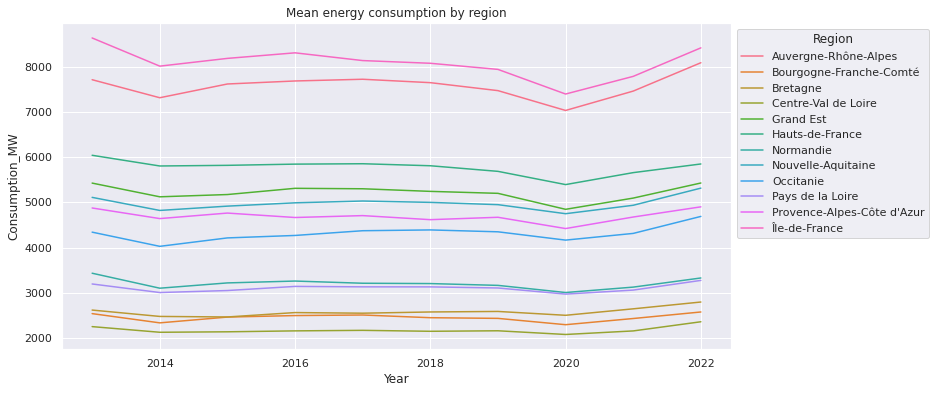

In [ ]:
yearregion = df.groupby(by=['Year', 'Region'])['Year', 'Region',"Consumption_MW", "Production"].mean()
fig = plt.figure(figsize=(12,6))
ax = sns.lineplot(data=yearregion, x="Year", y="Consumption_MW", hue="Region")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Mean energy consumption by region');

<ipython-input-30-730a4448d955>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset = df.groupby(["Year", "Region"])['Production', 'Consumption_MW'].sum()/2/1000


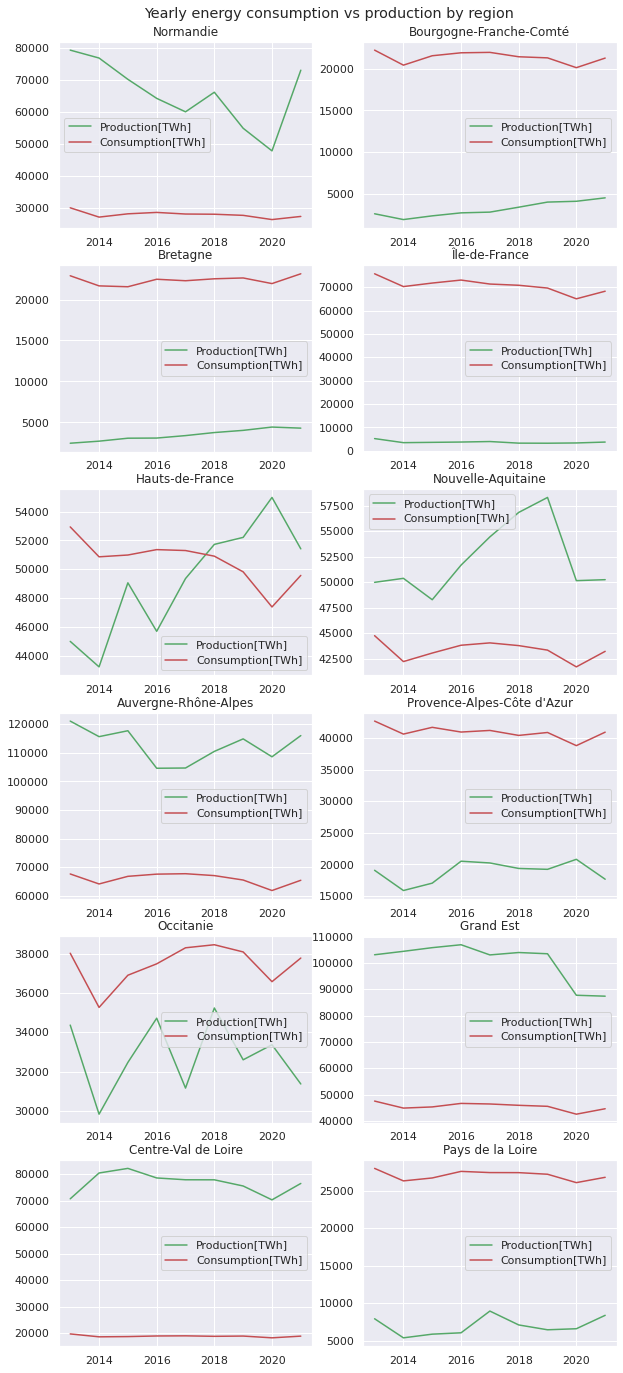

In [ ]:
fig=plt.figure(figsize=(10,24))
regions = df["Region"].unique()
dataset = df.groupby(["Year", "Region"])['Production', 'Consumption_MW'].sum()/2/1000
dataset.reset_index(inplace=True)
dataset=dataset[dataset["Year"]!=2022]
for i, region in enumerate(regions):
  x=dataset["Year"][dataset["Region"]==region]
  y1=dataset["Production"][dataset["Region"]==region]
  y2=dataset["Consumption_MW"][dataset["Region"]==region]
  ax=fig.add_subplot(6,2,i+1)
  plt.plot(x, y1, axes=ax, c='g', label="Production[TWh]")
  plt.plot(x, y2, axes=ax, c='r', label="Consumption[TWh]")
  ax.set_title(region)
  ax.legend()
plt.suptitle("Yearly energy consumption vs production by region", y=0.9)
plt.show()

In [ ]:
# Creation of variables to check production in 2014 vs. 2021 to make a comparison
prod_2014 = df[df['Date'].dt.strftime('%Y') == '2014']
prod_2021 = df[df['Date'].dt.strftime('%Y') == '2021']


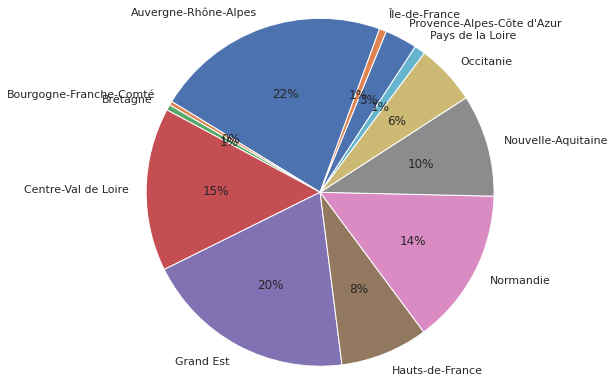

In [ ]:
prod_2014.groupby(["Region"]).sum().plot(
    kind='pie', y= "Production", autopct='%1.0f%%', radius=2, legend=None, startangle=70);


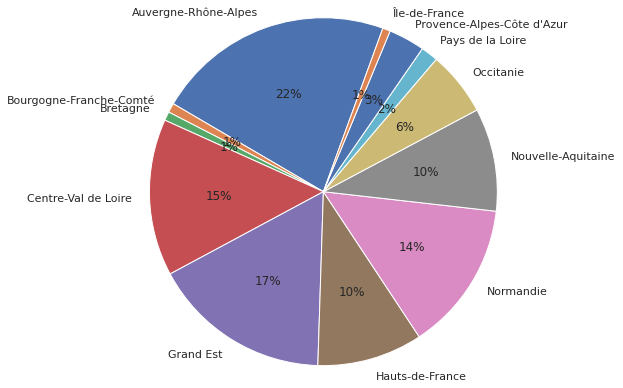

In [ ]:
prod_2021.groupby(["Region"]).sum().plot(
    kind='pie', y= "Production", autopct='%1.0f%%', radius=2, legend=None, startangle=70);

The region that produces the most energy in general is Auvergne-Rhone-Alpes and we can see it doesnt change much from 2014 until 2021.

# Nuclear energy production

In [ ]:
Nuclear_year= df.groupby(df['Date'].dt.year)['Nuclear_MW'].sum()
print(Nuclear_year)


Date
2013   806852567.0
2014   831008785.0
2015   832908808.0
2016   767408645.0
2017   757772631.0
2018   785967028.0
2019   758459526.0
2020   670460374.0
2021   721036508.0
2022   267860903.0
Name: Nuclear_MW, dtype: float64


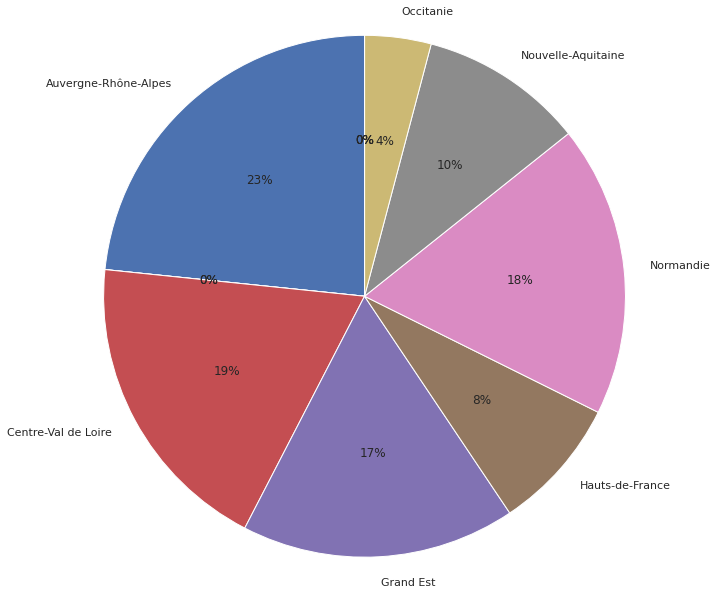

In [ ]:
prod_2021.groupby(["Region"]).sum().plot(
    kind='pie', y= "Nuclear_MW", autopct='%1.0f%%', radius=3, legend=None, startangle=90);

In 2021, the most recent full data in our dataset, the regions that produced the most Nuclear Energy are Auvergne-Rhone-Alpes, Centre-Val de Loire, Normandie and Grand Est with a total of 77% of the country production

# Renewable Energy Production

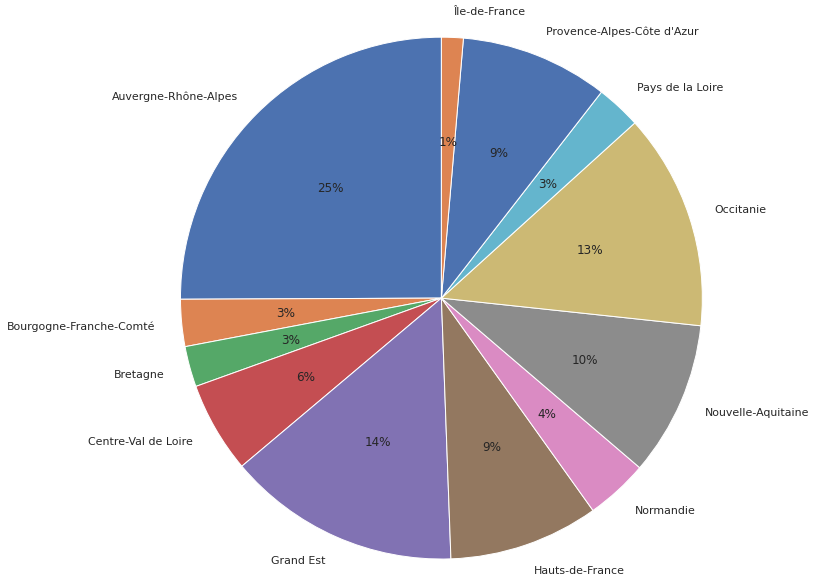

In [ ]:
prod_2021.groupby(["Region"]).sum().plot(
    kind='pie', y= "Renewable_MW", autopct='%1.0f%%', radius=3, legend=None, startangle=90);

In 2021, the most recent full data in our dataset, the regions that produced the most Renewable Energy are Auvergne-Rhone-Alpes, Grand Est and Occitanie with an aggregate of 55% of the country production

Share of renewable resources in total energy production by year:

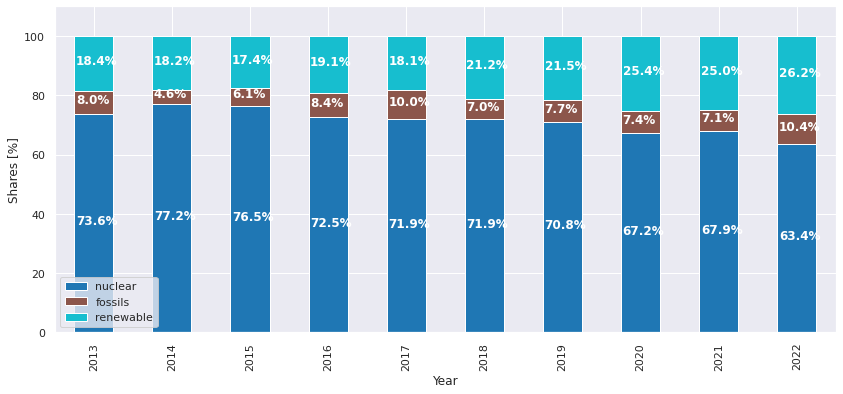

In [ ]:
renewable = df["Renewable_MW"]
nuclear = df["Nuclear_MW"]
fossils = df["Thermal_MW"]
total = renewable + nuclear + fossils
byyear=df.groupby("Year")[["Nuclear_MW", "Thermal_MW", "Renewable_MW"]].sum()
props = byyear.div(byyear.sum(axis=1), axis=0)*100
props.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(14, 6))

plt.legend(["nuclear", "fossils", "renewable"], loc="lower left", ncol=1)
plt.xlabel("Year")
plt.ylabel("Shares [%]")
plt.ylim(0,110)


for n, x in enumerate([*byyear.index.values]):
    for (proportion, y_loc) in zip(props.loc[x],
                                   props.loc[x].cumsum()):
                
        plt.text(x=n - 0.23,
                 y=(y_loc - proportion-0.3) + (proportion / 2),
                 s=f'{np.round(proportion, 1)}%', 
                 color="white",
                 fontsize=12,
                 fontweight="bold")

plt.show()

We can observe a slow increase in the share of renewable sources and a decrease in the share of nuclear energy since 2013

<ipython-input-38-51e39ca2b14c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  y1 = dff.groupby(["Year", "Quarter"])['Bioenergies_MW', 'Wind_MW', 'Solar_MW', 'Hydraulic_MW', 'Consumption_MW'].mean()/1000


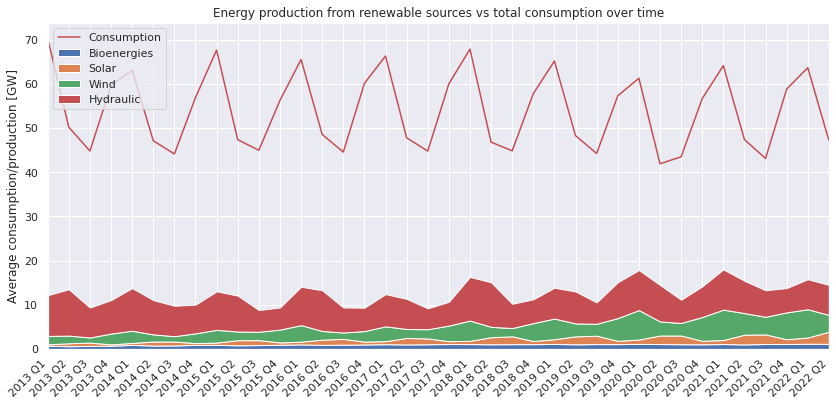

In [ ]:
# Coverage rate of green energy over time
y1 = dff.groupby(["Year", "Quarter"])['Bioenergies_MW', 'Wind_MW', 'Solar_MW', 'Hydraulic_MW', 'Consumption_MW'].mean()/1000
y1.reset_index(inplace=True)
y1["YearQrtr"] = y1["Year"].astype(str) + " Q" + y1['Quarter'].astype(str)
fig, ax = plt.subplots(figsize=(14,6))
plt.xticks(rotation=45, ha="right")
ax.stackplot(y1["YearQrtr"],y1["Bioenergies_MW"], y1["Solar_MW"], y1["Wind_MW"], y1["Hydraulic_MW"],
             labels=['Bioenergies','Solar','Wind', 'Hydraulic'])
ax.plot(y1["Consumption_MW"], c="r", label="Consumption")
ax.set_ylabel("Average consumption/production [GW]")
ax.set_xlim("2013 Q1", "2022 Q2")
ax.set_title("Energy production from renewable sources vs total consumption over time")
plt.legend(loc='upper left')
plt.show();

The gap between production of green energy and total consumption is very high. 

In [ ]:
# Droping 2 columns, which were calculated from others and used only to visualize data:
df.drop(["Production", "Renewable_MW"], axis=1, inplace=True)

## Merging data with meteo dataset

---


For the purposes of the next part - machine learning, we merge our data with weather dataset. Downloaded from:
https://public.opendatasoft.com/explore/dataset/donnees-synop-essentielles-omm/table

 From all weather characteristics, we use only 3: wind speed, wind direction and temperature

In [ ]:
meteo = pd.read_csv('/content/drive/MyDrive/Energy/meteo.csv', index_col=0, header=0, names=['Date', 'Region', 'Region_code', 'Wind_dir',
       'Wind_speed', 'Temperature'])

In [ ]:
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259555 entries, 0 to 410612
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         259555 non-null  object 
 1   Region       259555 non-null  object 
 2   Region_code  259555 non-null  int64  
 3   Wind_dir     259495 non-null  float64
 4   Wind_speed   259527 non-null  float64
 5   Temperature  259537 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 13.9+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980288 entries, 0 to 1980287
Data columns (total 18 columns):
 #   Column             Dtype         
---  ------             -----         
 0   INSEE_Region_code  int64         
 1   Region             object        
 2   Date               datetime64[ns]
 3   Hour               object        
 4   Date_hour          object        
 5   Consumption_MW     float64       
 6   Thermal_MW         float64       
 7   Nuclear_MW         float64       
 8   Wind_MW            float64       
 9   Solar_MW           float64       
 10  Hydraulic_MW       float64       
 11  Pumping_MW         float64       
 12  Bioenergies_MW     float64       
 13  Year               int64         
 14  Month              int64         
 15  Quarter            int64         
 16  DoW                int64         
 17  Day                int64         
dtypes: datetime64[ns](1), float64(8), int64(6), object(3)
memory usage: 272.0+ MB


In [ ]:
meteo.Date = pd.to_datetime(meteo.Date, utc=True)

In [ ]:
df.Date_hour = pd.to_datetime(df.Date_hour, utc=True)

In [ ]:
new = df.merge(meteo, how="inner", left_on=["Date_hour", "INSEE_Region_code"], right_on=["Date", "Region_code"], copy=False)
new

,INSEE_Region_code,Region_x,Date_x,Hour,Date_hour,Consumption_MW,Thermal_MW,Nuclear_MW,Wind_MW,Solar_MW,Hydraulic_MW,Pumping_MW,Bioenergies_MW,Year,Month,Quarter,DoW,Day,Date_y,Region_y,Region_code,Wind_dir,Wind_speed,Temperature
0,52,Pays de la Loire,2015-01-01,01:00,2015-01-01 00:00:00+00:00,4712.0,582.0,0.0,22.0,0.0,5.0,0.0,45.0,2015,1,1,3,1,2015-01-01 00:00:00+00:00,Pays de la Loire,52,0.0,0.0,-2.7
1,75,Nouvelle-Aquitaine,2015-01-01,01:00,2015-01-01 00:00:00+00:00,7402.0,115.0,5541.0,108.0,0.0,633.0,0.0,151.0,2015,1,1,3,1,2015-01-01 00:00:00+00:00,Nouvelle-Aquitaine,75,170.0,1.8,-2.4
2,76,Occitanie,2015-01-01,01:00,2015-01-01 00:00:00+00:00,6602.0,66.0,2620.0,176.0,0.0,2206.0,-16.0,75.0,2015,1,1,3,1,2015-01-01 00:00:00+00:00,Occitanie,76,155.7,1.9,-1.5
3,84,Auvergne-Rhône-Alpes,2015-01-01,01:00,2015-01-01 00:00:00+00:00,9566.0,202.0,12451.0,58.0,0.0,3193.0,-3.0,92.0,2015,1,1,3,1,2015-01-01 00:00:00+00:00,Auvergne-Rhône-Alpes,84,87.5,1.6,-2.6
4,24,Centre-Val de Loire,2015-01-01,01:00,2015-01-01 00:00:00+00:00,2984.0,77.0,10730.0,36.0,0.0,40.0,0.0,34.0,2015,1,1,3,1,2015-01-01 00:00:00+00:00,Centre-Val de Loire,24,195.0,1.4,-1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259466,32,Hauts-de-France,2022-05-31,23:00,2022-05-31 21:00:00+00:00,4499.0,940.0,3620.0,604.0,0.0,2.0,0.0,113.0,2022,5,2,1,31,2022-05-31 21:00:00+00:00,Hauts-de-France,32,235.0,2.2,10.6
259467,44,Grand Est,2022-05-31,23:00,2022-05-31 21:00:00+00:00,4580.0,1255.0,3713.0,747.0,1.0,1288.0,0.0,122.0,2022,5,2,1,31,2022-05-31 21:00:00+00:00,Grand Est,44,250.0,2.1,14.0
259468,75,Nouvelle-Aquitaine,2022-05-31,23:00,2022-05-31 21:00:00+00:00,3742.0,30.0,2689.0,140.0,0.0,202.0,0.0,164.0,2022,5,2,1,31,2022-05-31 21:00:00+00:00,Nouvelle-Aquitaine,75,266.0,2.4,16.9
259469,24,Centre-Val de Loire,2022-05-31,23:00,2022-05-31 21:00:00+00:00,5113.0,28.0,6856.0,219.0,0.0,1.0,0.0,68.0,2022,5,2,1,31,2022-05-31 21:00:00+00:00,Centre-Val de Loire,24,315.0,1.5,16.3


In [ ]:
new.to_csv('/content/drive/MyDrive/Energy/clean_data.csv')



---
Rough draft
